In [1]:
import torch
import numpy as np
import toydiff as tdf
import matplotlib.pyplot as plt

------

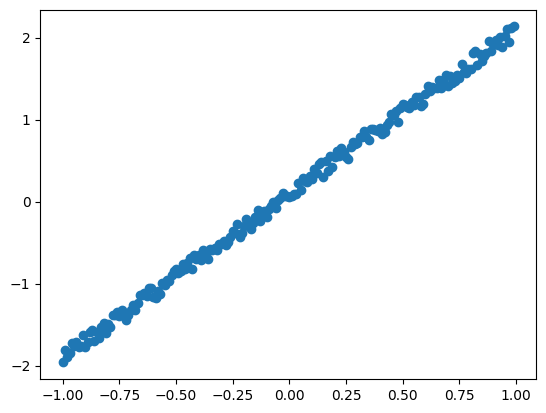

In [2]:
x = np.arange(-1, 1, 0.01)
y = 2 * x + (np.random.rand(len(x))) / 5

x = x.reshape(-1,1)
y = y.reshape(-1,1)

plt.scatter(x, y)

In [3]:
model = tdf.nn.blocks.Linear(1, 1)

In [4]:
feat = tdf.Tensor(x, track_gradient=True)
labels = tdf.Tensor(y, track_gradient=True)

In [5]:
from toydiff.nn.optim import GradientDescent
from toydiff.nn.functional import mse_loss

In [6]:
optimizer = GradientDescent(model)

In [7]:
model.weights

Tensor([[1.1860423]], dtype=float32, track_gradient=True)

In [8]:
# we want to minimize the sum of squares
losses = []
for i in range(10_000):
    optimizer.zero_grad()

    out = model(feat)
    loss = mse_loss(out, labels)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.value)

/Users/alejandroperezsanjuan/Git/toydiff/src/toydiff/core.py:568: RuntimeWarning: invalid value encountered in log
  grad_b = (self.power * np.log(data_a)) * grad_np


In [9]:
model.weights

Tensor([[1.882525]], dtype=float32, track_gradient=True)

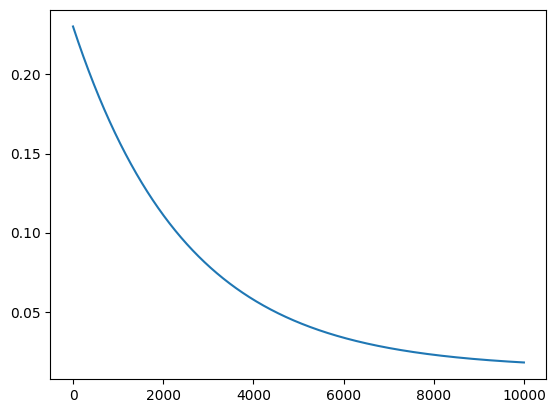

In [10]:
plt.plot(losses)